A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [4]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()

# cumulate cases and fill in missing dates
all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

In [5]:
casesc.tail()

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
2020-03-27 00:00:00+00:00,11045.0,12564.0,2207.0,753.0,259.0,1957.0,2798.0,330.0,3485.0,12202.0,2415.0,587.0,1645.0,586.0,945.0,683.0
2020-03-28 00:00:00+00:00,11958.0,13961.0,2393.0,790.0,284.0,2090.0,2983.0,351.0,3830.0,12939.0,2579.0,656.0,1797.0,628.0,1028.0,750.0
2020-03-29 00:00:00+00:00,12542.0,14758.0,2480.0,811.0,285.0,2179.0,3121.0,362.0,4004.0,13573.0,2723.0,729.0,1867.0,647.0,1069.0,770.0
2020-03-30 00:00:00+00:00,13181.0,15626.0,2613.0,874.0,294.0,2232.0,3298.0,373.0,4258.0,14228.0,2862.0,792.0,1976.0,720.0,1145.0,803.0
2020-03-31 00:00:00+00:00,13398.0,16485.0,2750.0,879.0,311.0,2285.0,3441.0,406.0,4380.0,14341.0,2897.0,829.0,2034.0,750.0,1235.0,860.0


In [6]:
# choose a random list of federal states to plot
plot_de = [
    'Hamburg',
    'Bremen',
    'Berlin',
    'Bayern',
    'Nordrhein-Westfalen',
]

In [7]:
germany  = cases.sum(axis=1)
germanyc = casesc.sum(axis=1)
germany.tail()

Meldedatum
2020-03-27 00:00:00+00:00    5868.0
2020-03-28 00:00:00+00:00    4556.0
2020-03-29 00:00:00+00:00    2903.0
2020-03-30 00:00:00+00:00    3355.0
2020-03-31 00:00:00+00:00    2006.0
dtype: float64

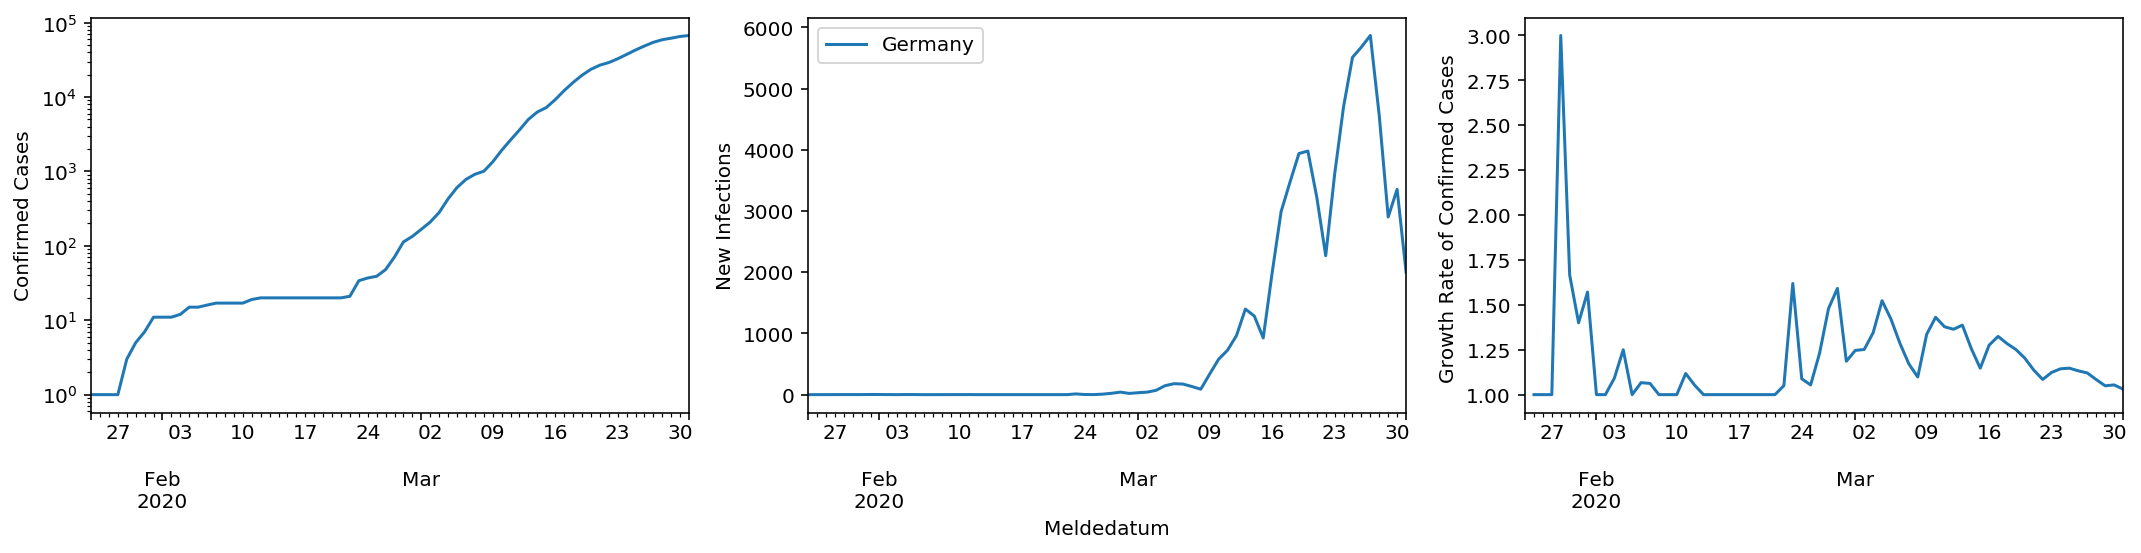

In [8]:
plt.close(1)
fig1, ax1 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=1)


germanyc.plot(ax=ax1[0], logy=True)
germany.plot(ax=ax1[1])
(germanyc / germanyc.shift(1)).plot(ax=ax1[2])

ax1[0].set_ylabel('Confirmed Cases')
ax1[1].set_ylabel('New Infections')
ax1[2].set_ylabel('Growth Rate of Confirmed Cases ')

ax1[1].legend(['Germany'])
fig1.tight_layout()

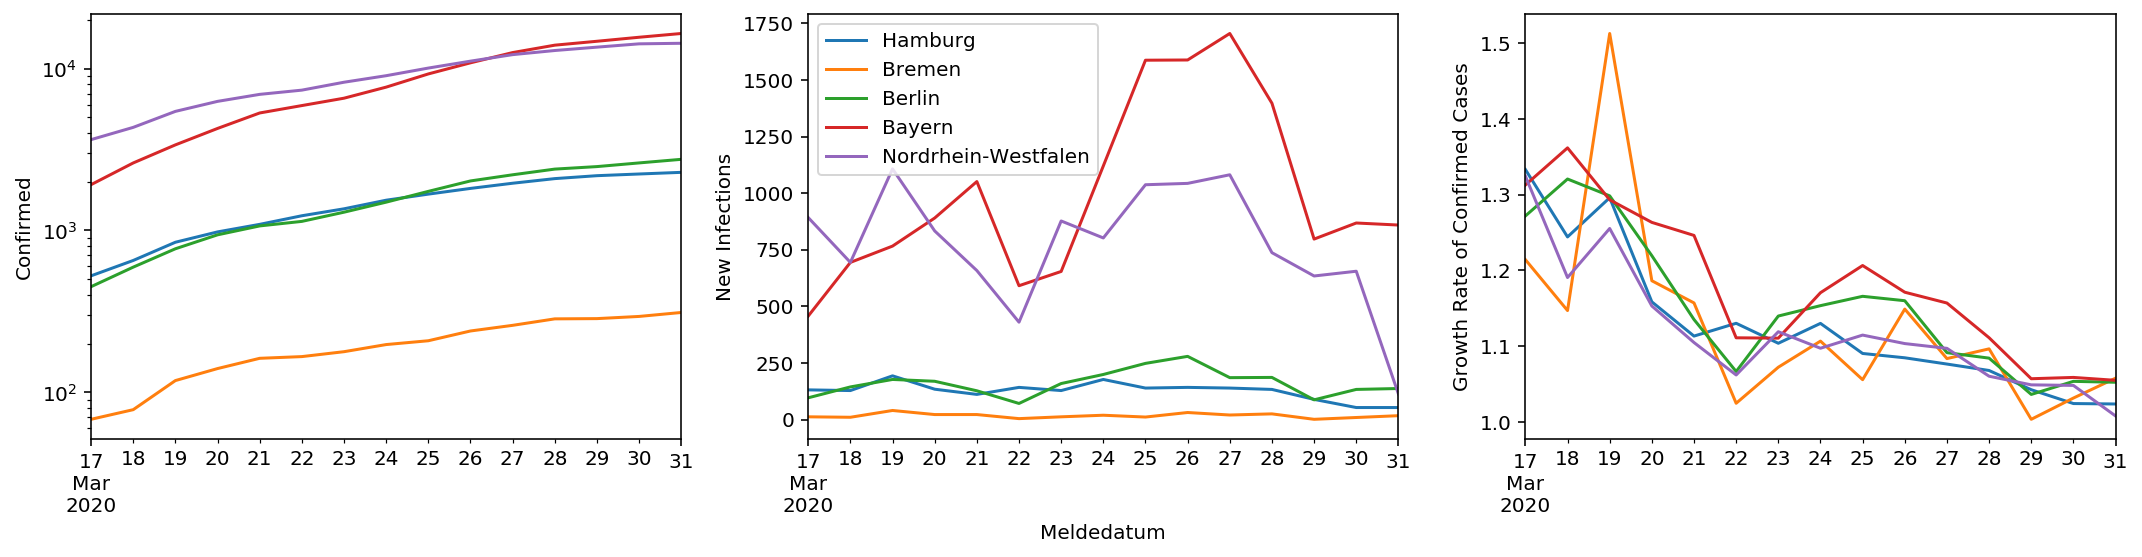

In [9]:
plt.close(2)
fig2, ax2 = plt.subplots(ncols=3, figsize=(15,4), sharex=True, num=2)

# show only last 2 weeks for better visibility
start = cases.index[-1].date() - pd.Timedelta('14d')
end   = cases.index[-1].date()

casesc.loc[start:end, plot_de].plot(ax=ax2[0], logy=True, legend=False)
cases.loc[start:end, plot_de].plot(ax=ax2[1], legend=False)
(casesc / casesc.shift(1)).loc[start:end, plot_de].plot(ax=ax2[2], legend=False)

ax2[0].set_ylabel('Confirmed')
ax2[1].set_ylabel('New Infections')
ax2[2].set_ylabel('Growth Rate of Confirmed Cases')

ax2[1].legend()

fig2.tight_layout()

In [10]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')